In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pathlib

%matplotlib inline

In [2]:
PROJECT_PATH = pathlib.Path('explore.ipnyb').parent.resolve()

In [3]:
infos_df = pd.read_csv(f'{PROJECT_PATH}/task/data/infos.csv', sep='|')
items_df = pd.read_csv(f'{PROJECT_PATH}/task/data/items.csv', sep='|')
orders_df = pd.read_csv(f'{PROJECT_PATH}/task/data/orders.csv', sep='|')

In [4]:
orders_df['full-date'] = pd.to_datetime(orders_df['time'])
orders_df['date'] = orders_df['full-date'].dt.date
orders_df['time'] = orders_df['full-date'].dt.time
orders_df['week'] = orders_df['full-date'].dt.week
orders_df['dayofweek'] = orders_df['full-date'].dt.dayofweek
orders_df['month'] = orders_df['full-date'].dt.month
orders_df['date'] = orders_df['full-date'].dt.date

orders_df['date'] = pd.to_datetime(orders_df['date'])

orders_df.drop(columns=['time'], inplace = True)

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93942/279493405.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders_df['week'] = orders_df['full-date'].dt.week


In [5]:
df = infos_df[['itemID']]

In [6]:
df = pd.merge(df, orders_df.groupby(['itemID']).aggregate({'order':np.sum}).reset_index(), on='itemID', how='left')
df.fillna(0, inplace=True)

In [7]:
df = pd.merge(df, orders_df.groupby(['itemID','dayofweek']).aggregate({'order':np.sum}).unstack(), on='itemID', how='left')
df.fillna(0, inplace=True)

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93942/2987082768.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = pd.merge(df, orders_df.groupby(['itemID','dayofweek']).aggregate({'order':np.sum}).unstack(), on='itemID', how='left')


In [8]:
for i in range(1,8,1):
  df['%'+str(i)] = df.iloc[:,(i+1)]/df.iloc[:,1]

In [9]:
df

,itemID,order,"(order, 0)","(order, 1)","(order, 2)","(order, 3)","(order, 4)","(order, 5)","(order, 6)",%1,%2,%3,%4,%5,%6,%7
0,1,693.0,629.0,11.0,9.0,32.0,3.0,6.0,3.0,0.907648,0.015873,0.012987,0.046176,0.004329,0.008658,0.004329
1,2,5.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.200000,0.400000,0.000000,0.000000,0.000000,0.200000,0.200000
2,3,331.0,1.0,1.0,6.0,317.0,4.0,1.0,1.0,0.003021,0.003021,0.018127,0.957704,0.012085,0.003021,0.003021
3,4,198.0,0.0,142.0,3.0,5.0,4.0,0.0,44.0,0.000000,0.717172,0.015152,0.025253,0.020202,0.000000,0.222222
4,5,180.0,4.0,124.0,43.0,3.0,1.0,3.0,2.0,0.022222,0.688889,0.238889,0.016667,0.005556,0.016667,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,10459,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10459,10460,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10460,10461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10461,10462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
df = df[df['order']>0]

In [11]:
X_1 = df[[ 'itemID', 'order', ('order', 0), ('order', 1), ('order', 2), ('order', 3), ('order', 4), ('order', 5), ('order', 6)]]
X_2 = df[['%1', '%2', '%3', '%4', '%5', '%6', '%7']]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_1_scaled = scaler.fit_transform(X_1.iloc[:,2:])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [13]:
sum_of_squared_distances_X1 = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_1_scaled)
    sum_of_squared_distances_X1.append(k_means.inertia_)

sum_of_squared_distances_X2 = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_2)
    sum_of_squared_distances_X2.append(k_means.inertia_)

Text(0, 0.5, 'sum_of_squared_distances_X2')

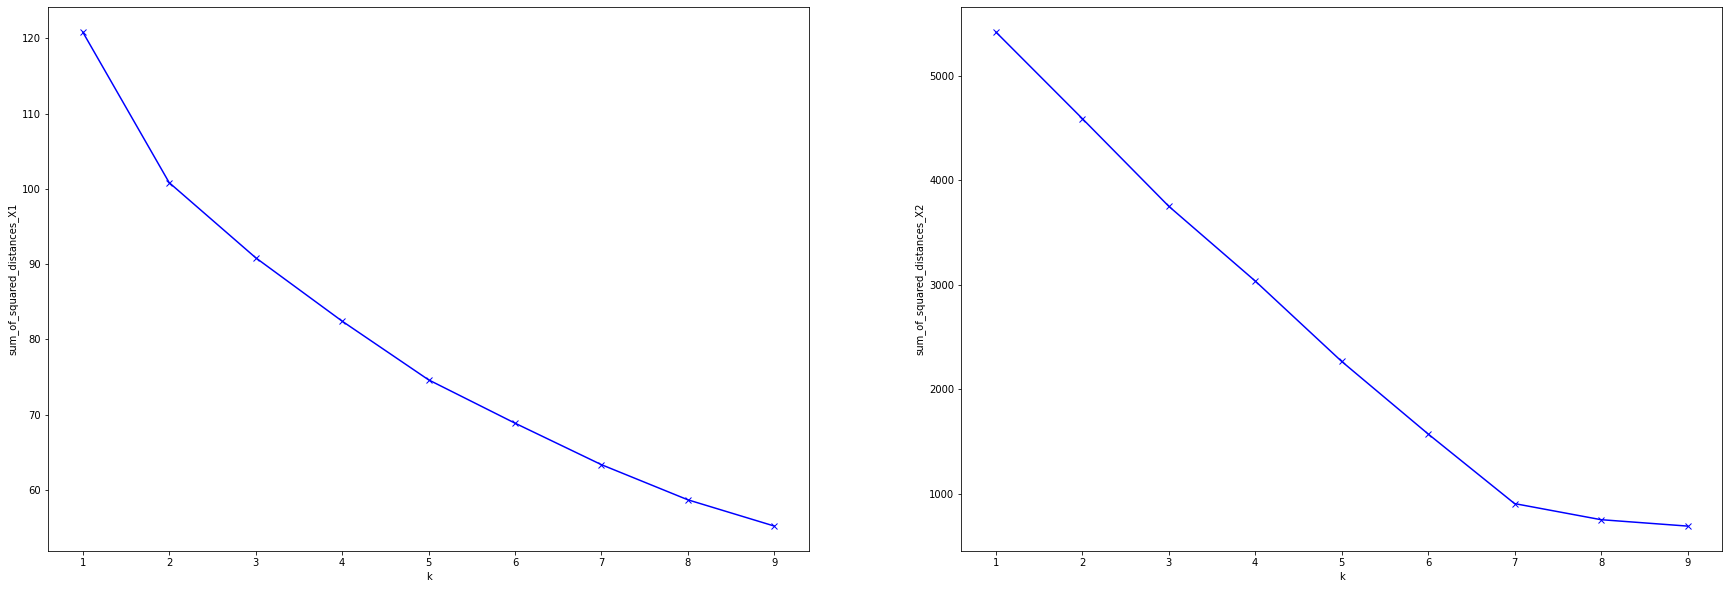

In [14]:
plt.figure(figsize=(30,10))

plt.subplot(121)
plt.plot(K, sum_of_squared_distances_X1, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances_X1')

plt.subplot(122)
plt.plot(K, sum_of_squared_distances_X2, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances_X2')

In [15]:
k_means = KMeans(n_clusters=3)
model = k_means.fit(X_1_scaled)
pred= k_means.predict(X_1_scaled)
labels = k_means.labels_

In [16]:
X_1['pred'] = pred

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93942/274018612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1['pred'] = pred


<AxesSubplot:>

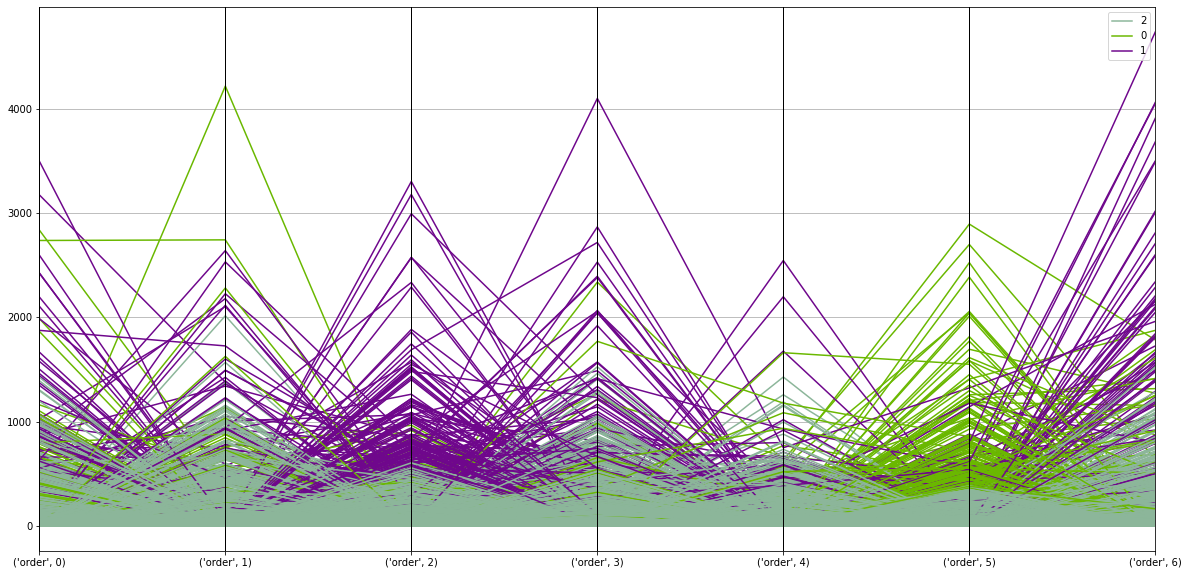

In [17]:
plt.rcParams["figure.figsize"] = [20, 10]
pd.plotting.parallel_coordinates(X_1.iloc[:,2:], 'pred')

In [18]:
k_means = KMeans(n_clusters=7)
model = k_means.fit(X_2)
pred= k_means.predict(X_2)
labels = k_means.labels_

In [19]:
X_2['pred'] = pred

/var/folders/b8/x09q_m_57xs12klvtzyzkd980000gn/T/ipykernel_93942/3572109037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['pred'] = pred


<AxesSubplot:>

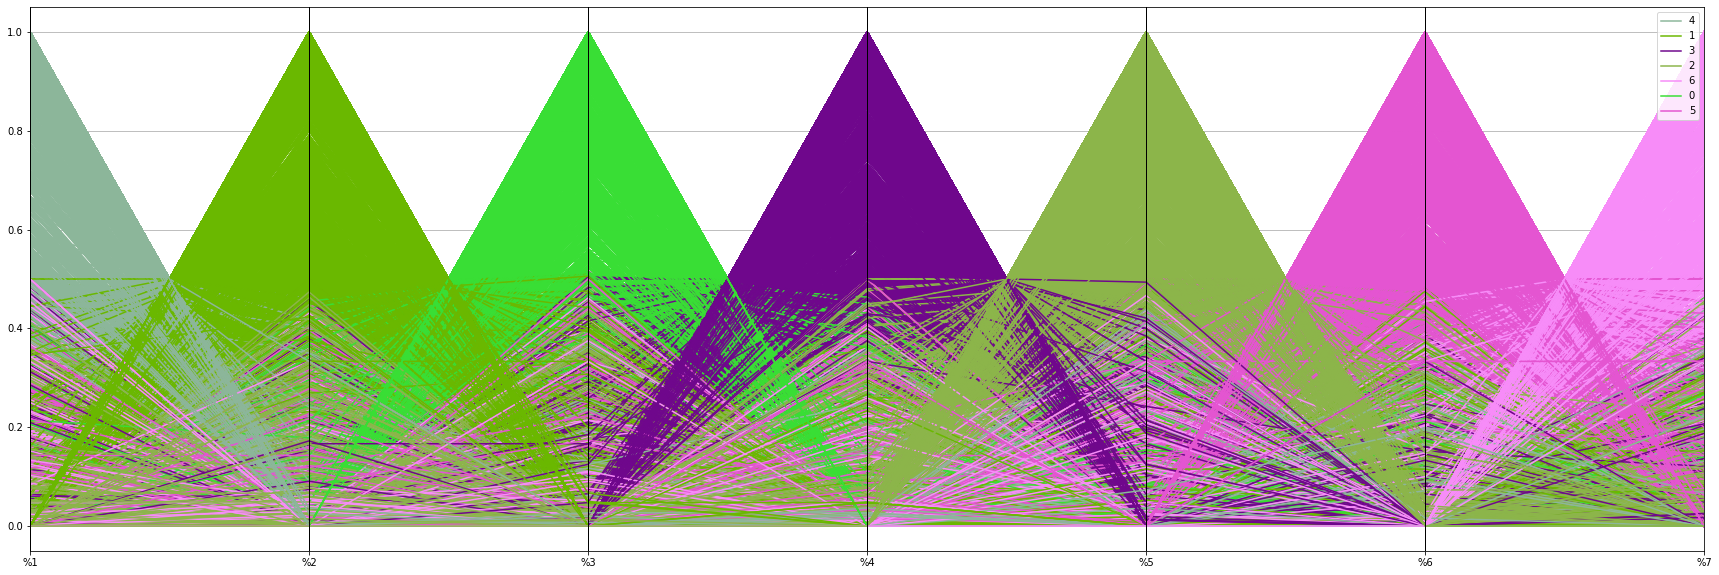

In [20]:
plt.rcParams["figure.figsize"] = [30, 10]
pd.plotting.parallel_coordinates(X_2, 'pred')

In [21]:
df = infos_df[['itemID','simulationPrice']]
df = pd.merge(df, orders_df.groupby(['itemID']).aggregate({'order':np.sum}).reset_index(), on='itemID', how='left')
df.fillna(0, inplace=True)
df = df[df['order']>0]

In [22]:
X_3 = scaler.fit_transform(df.iloc[:,1:])

In [23]:
sum_of_squared_distances_X3 = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_3)
    sum_of_squared_distances_X3.append(k_means.inertia_)

Text(0, 0.5, 'sum_of_squared_distances_X3')

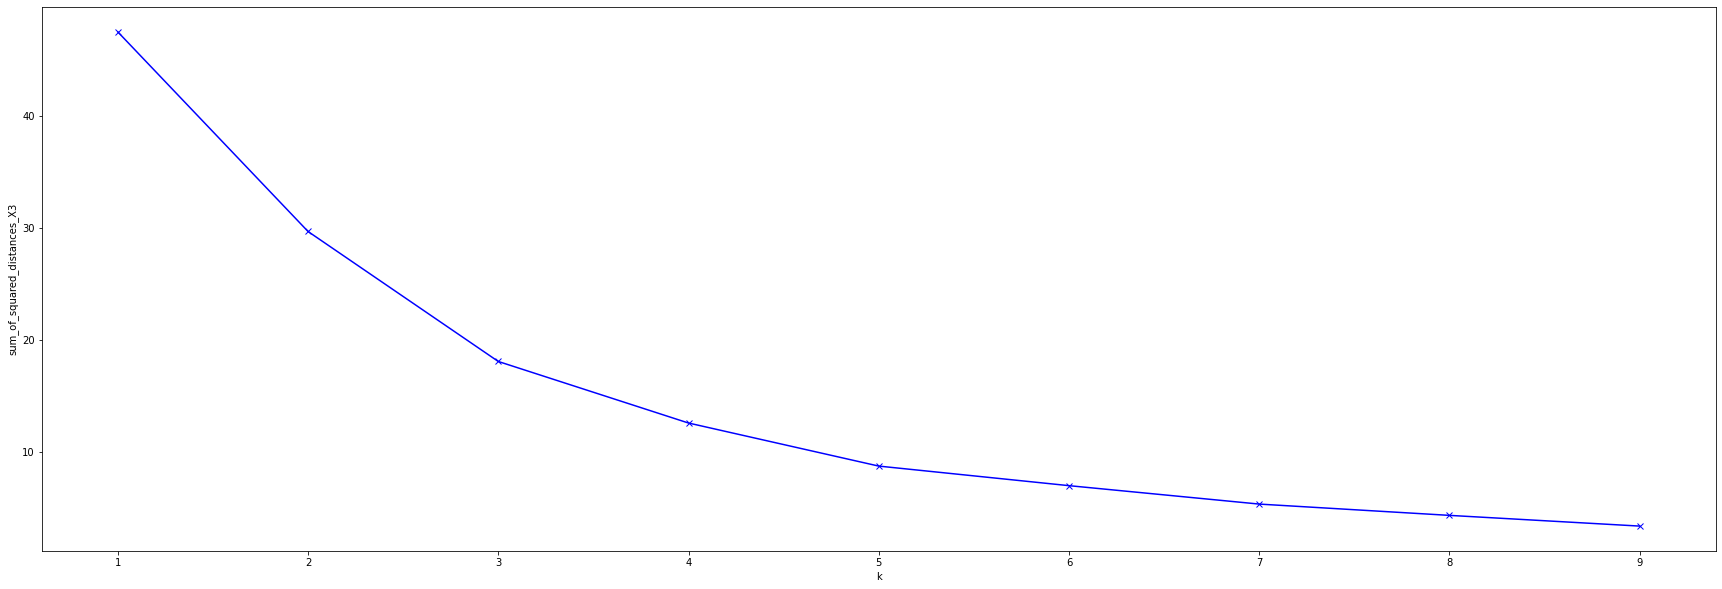

In [24]:
plt.plot(K, sum_of_squared_distances_X3, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances_X3')

In [25]:
k_means = KMeans(n_clusters=5)
model = k_means.fit(X_3)
pred= k_means.predict(X_3)
labels = k_means.labels_

In [26]:
df['pred'] = pred

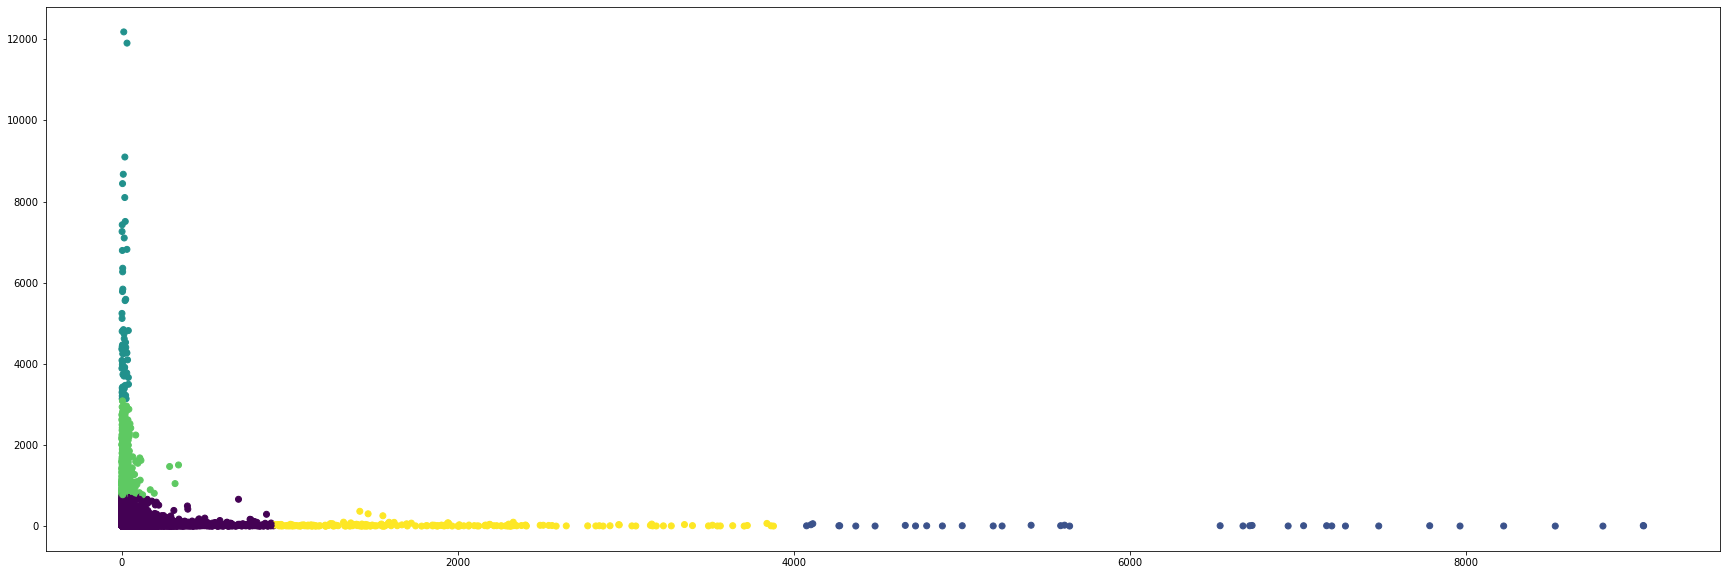

In [27]:
plt.scatter(df['simulationPrice'], df['order'], c=pred)